<a href="https://colab.research.google.com/github/DuarteVn/profit_prediction/blob/main/Previs%C3%A3o_de_Lucros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição do problema



* Base de dados
  * Input (X): Temperatura
  * Output(Y): Lucro diário em dólares
  



# Etapa 1: Importação de Bibliotecas

In [2]:
# %tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
tf.__version__

'2.18.0'

# Etapa 2: Importação da Base de dados

In [4]:
#Permissão para acessar arquivos doo Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Leitura do arquivo csv
profit_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Excel/ice_profit_prediction.csv')
profit_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [7]:
profit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


# Etapa 3: Visualização da Base de Dados

<Axes: xlabel='Temperature', ylabel='Revenue'>

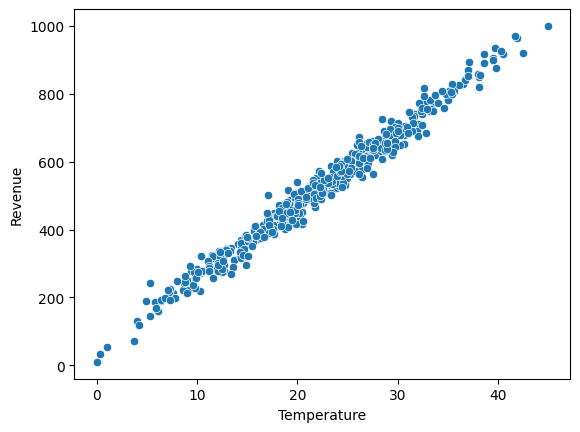

In [32]:
sns.scatterplot(x='Temperature', y='Revenue', data=profit_df)

# Etapa 4: Configuração da base de dados de treinamento

In [33]:
x_train = profit_df['Temperature']
y_train = profit_df['Revenue']

In [38]:
print(x_train.shape)
print(y_train.shape)


(500,)
(500,)
